In [13]:
# https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [14]:
# 디바이스를 cuda, cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [15]:
from torchvision import transforms
# 이미지를 정규화(Normalize)
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])

In [16]:
train_ratio = 0.8
train_size = int(len(training_data) * 0.8)
valid_size = len(training_data) - train_size

print(train_size, valid_size)

48000 12000


In [17]:
from torch.utils.data import random_split

train_dataset, valid_dataset = random_split(training_data, [train_size, valid_size])

In [18]:
from torch.utils.data import DataLoader
# 데이토 로더에 넣기
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [19]:
#
for images, labels in test_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


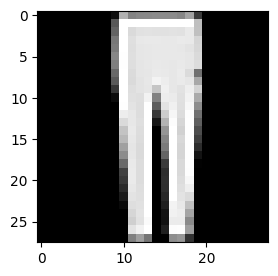

1


In [20]:
# 이미지를 시각화
import random
idx = random.randint(0, 63)
plt.figure(figsize=(3, 3))
plt.imshow(images[idx].squeeze(), cmap="gray")
plt.show()
print(labels[idx].item())